## Target Guided Ordinal Encoding 
It is a technique used to encode categorical variables based on their relationship with the target variable. This encoding technique is useful when we have a categorical variable with a large number of unique categories, and we want to use this variable as a feature in our machine learning model.

In Target Guided Ordinal Encoding, we replace each category in the categorical variable with a numerical value based on the mean or median of the target variable for that category. This creates a monotonic relationship between the categorical variable and the target variable, which can improve the predictive power of our model.

In [1]:
import pandas as pd

# create a sample dataframe with a categorical variable and a target variable
df = pd.DataFrame({
    'city': ['New York', 'London', 'Paris', 'Tokyo', 'New York', 'Paris'],
    'price': [200, 150, 300, 250, 180, 320]
})

In [2]:
df

,city,price
0,New York,200
1,London,150
2,Paris,300
3,Tokyo,250
4,New York,180
5,Paris,320


In [3]:
# Finding the means of all the unique categories

df.groupby("city")["price"].mean()

city
London      150.0
New York    190.0
Paris       310.0
Tokyo       250.0
Name: price, dtype: float64

In [4]:
df.groupby("city")["price"].mean().to_dict()

{'London': 150.0, 'New York': 190.0, 'Paris': 310.0, 'Tokyo': 250.0}

In [5]:
mean_price=df.groupby("city")["price"].mean().to_dict()

In [6]:
mean_price

{'London': 150.0, 'New York': 190.0, 'Paris': 310.0, 'Tokyo': 250.0}

In [7]:
df["city_encoded"]=df["city"].map(mean_price)

In [8]:
df

,city,price,city_encoded
0,New York,200,190.0
1,London,150,150.0
2,Paris,300,310.0
3,Tokyo,250,250.0
4,New York,180,190.0
5,Paris,320,310.0


<Axes: xlabel='city_encoded', ylabel='price'>

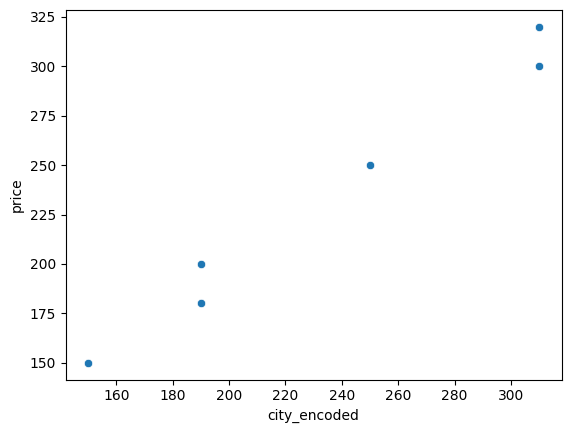

In [9]:
import seaborn as sns

sns.scatterplot(x="city_encoded",y="price",data=df)

# As you can see there is a monotonic relationship between the features

In [10]:
# So here based on the mean of cartegorical variable it will build a monotonic relationship with the target variable

In [11]:
## implement the same concept between time and total_bill

import seaborn as sns

df=sns.load_dataset("tips")

In [12]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [13]:
df=df[["time","total_bill"]]

In [14]:
df

,time,total_bill
0,Dinner,16.99
1,Dinner,10.34
2,Dinner,21.01
3,Dinner,23.68
4,Dinner,24.59
...,...,...
239,Dinner,29.03
240,Dinner,27.18
241,Dinner,22.67
242,Dinner,17.82


In [15]:
df.groupby("time")["total_bill"].mean()

time
Lunch     17.168676
Dinner    20.797159
Name: total_bill, dtype: float64

In [16]:
df.groupby("time")["total_bill"].mean().to_dict()

{'Lunch': 17.168676470588235, 'Dinner': 20.79715909090909}

In [17]:
mean_time=df.groupby("time")["total_bill"].mean().to_dict()

In [18]:
mean_time

{'Lunch': 17.168676470588235, 'Dinner': 20.79715909090909}

In [19]:
df["time_encoded"]=df["time"].map(mean_time)

C:\Users\Nethajimahendra K\AppData\Local\Temp\ipykernel_28244\576599807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["time_encoded"]=df["time"].map(mean_time)


In [20]:
df

,time,total_bill,time_encoded
0,Dinner,16.99,20.797159
1,Dinner,10.34,20.797159
2,Dinner,21.01,20.797159
3,Dinner,23.68,20.797159
4,Dinner,24.59,20.797159
...,...,...,...
239,Dinner,29.03,20.797159
240,Dinner,27.18,20.797159
241,Dinner,22.67,20.797159
242,Dinner,17.82,20.797159


<Axes: xlabel='time_encoded', ylabel='total_bill'>

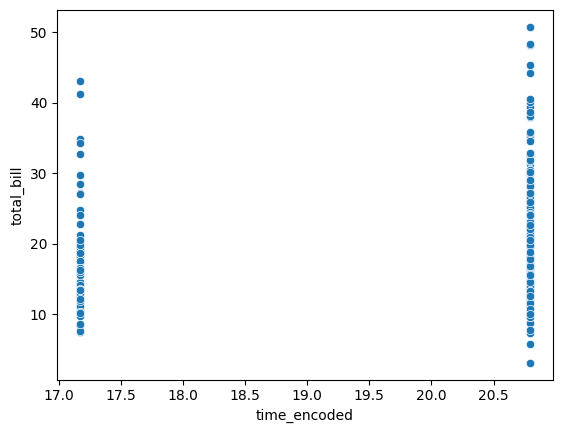

In [21]:
sns.scatterplot(x=df["time_encoded"],y=df["total_bill"])